# Questionário - Semana 4 

Leia o texto a seguir para responder o questionário.

## Contextualização

### O IMC

O índice de massa corpórea (IMC) é usado para saber se um indivíduo está no peso ideal. Ele é definido pela fórmula

$$IMC = \dfrac{M}{A^2},$$

onde $M$ é a massa (considere quilogramas) do indivíduo e $A$ é a sua altura (considere metros). Um indíviduo tem *peso normal* se seu IMC estiver no intervalo faixa $18.5 \leq IMC < 25.0$. 

### Jogadores da Copa 2018

A seleção brasileira masculina de futebol profissional convocada para a Copa do Mundo 2018 era composta de 23 jogadores, a saber: Alisson, Casemiro, Cássio, Danilo, Douglas Costa, Ederson, Fagner, Fernandinho, Filipe Luis, Firmino, Fred, Gabriel Jesus, Geromel, Marcelo, Marquinhos, Miranda, Neymar, Paulinho, Philippe Coutinho, Renato Augusto, Taison, Thiago Silva e Willian.

O arquivo `04c-copa2018.npy`, disponibilizado juntamente com este arquivo, contém uma tabela de peso, altura e idade de cada um desses atletas. 

[[Fonte: ESPN]](https://www.espn.com.br/artigo/_/id/4310177/selecao-brasileira-veja-o-censo-completo-dos-jogadores-que-vao-a-copa)

### Taxa Metabólica Basal (TMB)

A TMB é a quantidade mínima de energia que o ser humano, em repouso, precisa para sobreviver. A *Equação de Mifflin - St. Jeor* para calcular a TMB em kcal/dia (quilocalorias por dia) de pessoas do sexo masculino é dada por: 

$$TMB = 10M + 6.25A + 5I + 5,$$

onde $M$ é a massa do indivíduo, $A$ sua altura e $I$ sua idade. 

[[Fonte: Wiikipedia]](https://en.wikipedia.org/wiki/Basal_metabolic_rate)


### A física do chute de uma bola

O movimento executado por uma bola de futebol ao ser chutada a partir do campo por um jogador é similar ao movimento parabólico de um projétil. A velocidade da bola $V_b$ pode ser calculada pela expressão:

$$V_b = V_p\left( \dfrac{M_p}{M_p + M_b} \right)(1 + e),$$

onde $V_p$ é a velocidade da perna do chutador, $M_p$ é a massa da perna do chutador, $M_b$ é a massa da bola e $e$ é o *coeficiente de restituição* da bola. 

O alcance $a$ é a medida horizontal máxima que a bola atinge a partir do ponto de lançamento de acordo com um certo ângulo em que é lançada. Como conhecemos da Física Básica, a fórmula para o alcance é dada por: 

$$a = \dfrac{V_b^2\textrm{sen}(2\alpha)}{g}$$

Diante disso, considere os seguintes dados: 

- A massa da bola de futebol profissional é de 400 gramas e seu coeficiente de restituição é 0.7.
- A massa da perna de um jogador equivale a 20% de sua massa.
- A velocidade da perna de um jogador é de 20 m/s.
- A constante gravitacional equivale a 9.8 m/s<sup>2</sup>.

[[Fonte: Physics of Kicking a Soccer Ball]](http://www.mathematicshed.com/uploads/1/2/5/7/12572836/physicsofkickingsoccerball.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Questão 1

Escreva uma função que retorne uma tupla `(x,y)`, em que: 

- `x`: o $IMC$ médio do grupo de jogadores cujo nome profissional (conforme aparece na lista; inclua sobrenomes, se for o caso) tem a primeira letra como consoante e a última como vogal. Considere apenas uma casa decimal.
- `y`: o número de jogadores que satisfazem à condição anterior.

Assinale a alternativa correta:

a. `(22.6,14)`

b. `(22.5,12)` (<--)

c. `(22.1,12)`

d. `(22.2,23)`

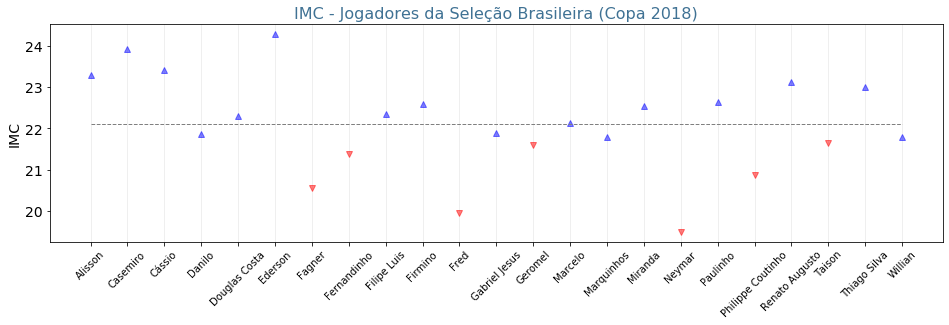

In [2]:
lu = np.load('04c-copa2018.npy',allow_pickle=True)
jogador = lu[:,0]
massa = lu[:,1]
altura = lu[:,2]
idade = lu[:,3]

imc = massa/altura**2 # IMC

g1 = np.where(imc < 21.7,True,False) # grupo 1
g2 = g1 == False # grupo 2

# PLOT
plt.figure(figsize=(16,4))
plt.plot(jogador,imc,lw=0)
plt.plot(jogador[g1],imc[g1],'vr',alpha=0.5)
plt.plot(jogador[g2],imc[g2],'^b',alpha=0.5)
plt.plot(jogador,np.ones(np.shape(imc))*np.mean(imc),'--',lw=1,c=[0.5,0.5,0.5])
plt.xticks(rotation=45);
plt.ylabel('IMC',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.title('IMC - Jogadores da Seleção Brasileira (Copa 2018)',c='#407294',fontsize=16)
plt.grid(axis='x',alpha=0.25)
#plt.savefig('IMC.png')

In [3]:
# 
import string
lets = np.array(list(string.ascii_lowercase))
vogs = np.array(['a','e','i','o','u'])
cons = np.sort(np.array(list((set(lets) - set(vogs)))))

ivc = [] # indices
for i,n in enumerate(jogador):
    if n[0].lower() in cons and n[-1] in vogs:        
        ivc.append(i)
        
imc[ivc].mean(), len(ivc)

(22.48055104970767, 12)

## Questão 2 

Considere a lista de jogadores que você usou na questão anterior (com inicial e última letra segundo às condições). Nesta lista, você possui $n$ jogadores com nome duplo (nome + sobrenome). Se $M$ é o maior $IMC$ entre estes $n$ jogadores com nome duplo e $m$ o menor $IMC$, assinale a alternativa correta para o valor de $x = |M - m|$, isto é, a maior variação de $IMC$ entre os $n$ jogadores. 

Use duas casas decimais:

a. `x = 1.01`

b. `x = 0.65`

c. `x = 0.90`

d. `x = 2.26` (<--)

In [14]:
duplo = ['Douglas Costa','Philippe Coutinho','Renato Augusto','Thiago Silva']

ic = [] # indices
for i,n in enumerate(jogador):    
    if n in duplo:          
        ic.append(i)

round(abs(imc[ic].max() - imc[ic].min()),2)

Douglas Costa
Philippe Coutinho
Renato Augusto
Thiago Silva


2.26

In [5]:
jogador

array(['Alisson', 'Casemiro', 'Cássio', 'Danilo', 'Douglas Costa',
       'Ederson', 'Fagner', 'Fernandinho', 'Filipe Luis', 'Firmino',
       'Fred', 'Gabriel Jesus', 'Geromel', 'Marcelo', 'Marquinhos',
       'Miranda', 'Neymar', 'Paulinho', 'Philippe Coutinho',
       'Renato Augusto', 'Taison', 'Thiago Silva', 'Willian'],
      dtype=object)

In [6]:
imc

array([23.299799895836188, 23.92485822306238, 23.405654174884944,
       21.85727788279773, 22.30935640886966, 24.280263614290668,
       20.549886621315196, 21.38593635289987, 22.34029706557179,
       22.587833094227893, 19.95728440880922, 21.877551020408163,
       21.606648199445985, 22.12973972783723, 21.798202394816204,
       22.54595907041276, 19.487382745408905, 22.6421929718633,
       20.86111966075032, 23.12406058503873, 21.63331530557058,
       22.99262444384723, 21.79944510503369], dtype=object)

In [7]:
ic

[4, 19, 21]

## Questão 3

Considere que a escalação da seleção brasileira da Copa 2018 listada acima permanecesse a mesma ao longo do tempo. Assuma que a idade dos jogadores no início de 2018 era aquela disponibilizada no arquivo. Use a equação de Mifflin - St. Jeor para calcular qual seria a demanda calórica total E em kcal para manter o time apenas respirando durante todo o ano de 2027, isto é, o valor da TMB. Então, assinale a alternativa correta.

**Obs.**:Note que a idade dos jogadores muda anualmente.

a. 7.7x10<sup>8</sup> kcal < E < 7.8x10<sup>8</sup> kcal (<--)

b. 7.5x10<sup>8</sup> kcal < E < 7.6x10<sup>8</sup> kcal

c. 7.6x10<sup>8</sup> kcal < E < 7.7x10<sup>8</sup> kcal

d. 7.8x10<sup>8</sup> kcal < E < 7.9x10<sup>8</sup> kcal


'7.732046e+06'

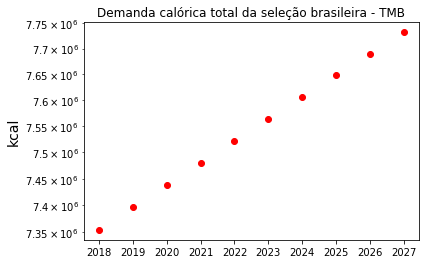

In [8]:
# Eq. Mifflin - St. Jeor
mifflin = lambda M,A,I: 10*M + 6.25*A + 5*I + 5 # kcal / dia 

TMB_jogadores = mifflin(massa,altura,idade)

# energia necessária nos próximos 5 anos

y = 10
TMB = {}
for i in range(y):
    TMB[2018+i] = np.sum(365*mifflin(massa,altura,idade+i)) # kcal necessárias por ano para o time
    
for i in TMB.keys():    
    plt.semilogy(i,TMB[i],'ro-')
plt.ylabel('kcal',fontsize=14);
plt.xticks(np.arange(2018,2018+y));
plt.title('Demanda calórica total da seleção brasileira - TMB');
f'{TMB[2027]:e}'

## Questão 4

Assuma que um campo de futebol profissional "padrão FIFA" possui área de 100 x 68 <sup>2</sup>. Além disso, defina um *Whole-Field Kicker* (WFK) o jogador que, chutando uma bola a um ângulo de 45 graus, consegue transportá-la de gol a gol, ou seja de uma linha de fundo a outra, e como *Not Whole-Field Kicker* (not WFK) aquele que não consegue realizar esta proeza. Usando os dados disponíveis na tabela dos jogadores da seleção de 2018 e a equação do alcance, determine a tupla
`(x,y,u,v)`, onde:

- `x`: o nome do WFK do time que tem o chute mais longe.
- `y`: o alcance máximo de chute do jogador `x`
- `u`: o nome do WFK do time que tem o chute mais curto.
- `v`: o alcance máximo de chute do jogador `u`

Assinale a alternativa correta:

a. `('Cássio', 101.50, 'Fagner', 100.05)`

b. `('Cássio', 100.90, 'Fred', 98.42)`

c. `('Cássio', 100.87, 'Paulinho', 100.05)` (<--)

d. `('Alisson', 100.87, 'Paulinho', 100.00)`


('Cássio', 100.87, 'Paulinho', 100.05)

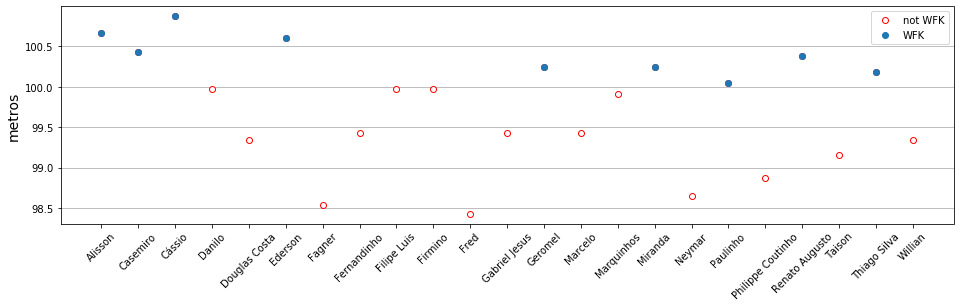

In [9]:
# vp: velocidade da perna do jogador (fixa: 20 m/s)
# mp: massa da perna do jogador (10% da massa do jogador)
# e: coeficiente de restituição da bola (média da bola oficial: 0.7)
# mb: massa da bola de futebol oficial (mb = 0.4 kg)
# alpha: angulo de lançamento da bola (chute)
# g: constante gravitacional (9.8 m/s2)

# velocidade da bola em m/s
vb = lambda vp,mp,mb,e: vp*(mp/(mp + mb))*(1 + e)

# formula do alcance: movimento projetil
alcance = lambda vb, alpha, g: vb**2*np.sin(2*alpha)/g

# Considere o campo FIFA: 100 m x 68 m

e = 0.7
vp = 20.0
mb = 0.4
g = 9.8
alpha = 45

MP = 0.2*massa # massas perna
VB = vb(vp,MP,mb,e) # vels bola
ALC = alcance(VB,alpha,g)

# quais jogadores conseguem um 'chute de campo inteiro'
kicker = ALC >= 100

plt.figure(figsize=(16,4))
plt.plot(jogador,ALC,'ro',mfc='w')
plt.plot(jogador[kicker],ALC[kicker],'o')
plt.xticks(rotation=45);
plt.ylabel('metros',fontsize=14);
plt.legend(['not WFK','WFK']); # Whole-Field Kicker
plt.grid(axis='y');


# maior, menor alcance
jkicker = jogador[kicker]
jkicker
maior = np.max(ALC[kicker])
menor = np.min(ALC[kicker])
jkicker[np.argmax(ALC[kicker])],round(maior,2),jkicker[np.argmin(ALC[kicker])],round(menor,2)

In [16]:
ALC

array([100.6623355477662, 100.43417336459261, 100.87066525130435,
       99.97787720718757, 99.3430986388783, 100.60726109356631,
       98.54194788727982, 99.43037568157428, 99.97787720718757,
       99.97787720718757, 98.42679516806024, 99.43037568157428,
       100.24827026077386, 99.43037568157428, 99.90583406255675,
       100.24827026077386, 98.65338915390679, 100.04807406457067,
       98.86583246069982, 100.3736981750168, 99.1607341089165,
       100.18320567039869, 99.3430986388783], dtype=object)

## Questão 5


Ao chutar a bola do mesmo modo como explicado na questão anterior, cada jogador faz com que a bola atinja uma altura máxima. Suponha que M1, M2 e M3 sejam os valores de altura máxima dos chutes realizados pelos jogadores da seleção de 2018 cujos nomes iniciam-se pela letra M, mas organizados em ordem alfabética a partir da segunda letra em diante. Considerando os mesmos dados físicos da questão anterior e a fórmula para a altura máxima dada por

$$h = \dfrac{ V_b^2\textrm{sen}^2(\alpha) }{2g},$$

assinale a alternativa correta. 

**Obs.:** use duas casas decimais.


a. M1 > M2 > M3

b. M1 < M2 < M3 (<--)

c. M1 = M2 < M3

d. M1 = M3 > M2

[40.26371392886744 40.456247851280324 40.59491526583438]


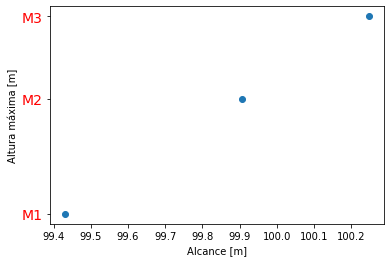

In [10]:
# vp: velocidade da perna do jogador (fixa: 20 m/s)
# mp: massa da perna do jogador (10% da massa do jogador)
# e: coeficiente de restituição da bola (média da bola oficial: 0.7)
# mb: massa da bola de futebol oficial (mb = 0.4 kg)
# alpha: angulo de lançamento da bola (chute)
# g: constante gravitacional (9.8 m/s2)

# velocidade da bola em m/s
vb = lambda vp,mp,mb,e: vp*(mp/(mp + mb))*(1 + e)

# formula da altura maxima
altmax = lambda vb, alpha, g: (vb**2*np.sin(alpha)**2)/(2*g)

e = 0.7
vp = 20.0
mb = 0.4
g = 9.8
alpha = 45

MP = 0.2*massa # massas perna
VB = vb(vp,MP,mb,e) # vels bola
ALT = altmax(VB,alpha,g)

jogm = ['Marcelo','Marquinhos','Miranda']

idm = []
for i,v in enumerate(jogador):
    if v in jogm:
        idm.append(i)
    
plt.plot(ALC[idm],ALT[idm],'o')
plt.xlabel('Alcance [m]')
plt.ylabel('Altura máxima [m]')
plt.yticks(list(ALT[idm]),['M1','M2','M3'],fontsize=14,c='r')
print(ALT[idm])